In [1]:
import pandas as pd
import numpy as np
np.float_ = np.float64
import matplotlib.pyplot as plt
from random import sample
import yfinance as yf
from SimulatedAnnealing import Annealer

# Demo: Simulated Annealing for the Portfolio Optimisation Problem

Firstly, the data is loaded for four stocks.

In [2]:
tickers = ['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AMD', 'AAP', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BF.B', 'CHRW', 'CA', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'CBOE', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CHK', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'GLW', 'COST', 'COTY', 'CCI', 'CSRA', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DG', 'DLTR', 'D', 'DOV', 'DWDP', 'DPS', 'DTE', 'DRE', 'DUK', 'DXC', 'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ETR', 'EVHC', 'EOG', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ES', 'RE', 'EXC', 'EXPE', 'EXPD', 'ESRX', 'EXR', 'XOM', 'FFIV', 'FB', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FISV', 'FLIR', 'FLS', 'FLR', 'FMC', 'FL', 'F', 'FTV', 'FBHS', 'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GD', 'GE', 'GGP', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GS', 'GT', 'GWW', 'HAL', 'HBI', 'HOG', 'HRS', 'HIG', 'HAS', 'HCA', 'HCP', 'HP', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HPQ', 'HUM', 'HBAN', 'HII', 'IDXX', 'INFO', 'ITW', 'ILMN', 'IR', 'INTC', 'ICE', 'IBM', 'INCY', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IQV', 'IRM', 'JEC', 'JBHT', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KHC', 'KR', 'LB', 'LLL', 'LH', 'LRCX', 'LEG', 'LEN', 'LUK', 'LLY', 'LNC', 'LKQ', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MRO', 'MPC', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MAT', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD', 'MGM', 'KORS', 'MCHP', 'MU', 'MSFT', 'MAA', 'MHK', 'TAP', 'MDLZ', 'MON', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MYL', 'NDAQ', 'NOV', 'NAVI', 'NTAP', 'NFLX', 'NWL', 'NFX', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NBL', 'JWN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'PCAR', 'PKG', 'PH', 'PDCO', 'PAYX', 'PYPL', 'PNR', 'PBCT', 'PEP', 'PKI', 'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'RL', 'PPG', 'PPL', 'PX', 'PCLN', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RRC', 'RJF', 'RTN', 'O', 'RHT', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'COL', 'ROP', 'ROST', 'RCL', 'CRM', 'SBAC', 'SCG', 'SLB', 'SNI', 'STX', 'SEE', 'SRE', 'SHW', 'SIG', 'SPG', 'SWKS', 'SLG', 'SNA', 'SO', 'LUV', 'SPGI', 'SWK', 'SBUX', 'STT', 'SRCL', 'SYK', 'STI', 'SYMC', 'SYF', 'SNPS', 'SYY', 'TROW', 'TPR', 'TGT', 'TEL', 'FTI', 'TXN', 'TXT', 'TMO', 'TIF', 'TWX', 'TJX', 'TMK', 'TSS', 'TSCO', 'TDG', 'TRV', 'TRIP', 'FOXA', 'FOX', 'TSN', 'UDR', 'ULTA', 'USB', 'UAA', 'UA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UTX', 'UHS', 'UNM', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VIAB', 'V', 'VNO', 'VMC', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'WEC', 'WFC', 'HCN', 'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYN', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']
start, end = '2024-01-01', '2024-06-01'

nb_stocks = 4  # Number of stocks to build the portfolio
#tickers_indices = sample(range(len(tickers)), nb_stocks)
tickers_indices = [211, 145, 408, 25]
# tickers_indices = [293, 311, 307, 381] # Local Minima
print(tickers_indices)

df = pd.DataFrame()

for ticker in [tickers[t] for t in tickers_indices]:
    dfTemp = yf.download(ticker, start, end)
    dfTemp = dfTemp.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
    dfTemp.columns=[ticker]
    df = pd.concat([df, dfTemp], axis=1)

[211, 145, 408, 25]


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
df.head()

,GD,DAL,SBAC,ALL
Date,,,,
2024-01-02,258.600006,40.450001,254.979996,143.809998
2024-01-03,256.540009,38.740002,248.309998,145.000000
2024-01-04,256.179993,39.200001,249.889999,148.500000
2024-01-05,253.899994,40.540001,246.589996,149.979996
2024-01-08,253.820007,41.630001,248.419998,149.380005


## Finding the Solution via Brute Force 

Here, since this is a small problem, we can quickly compute the optimal solution via brute force so it can be conpared to the results we get from the dsimulated annealing.

<BarContainer object of 16 artists>

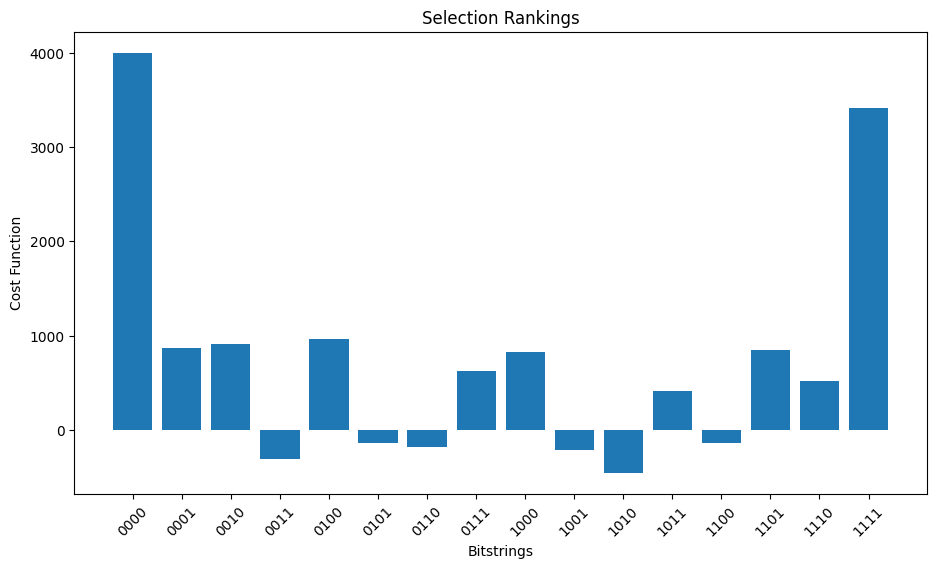

In [56]:
q = 0.5  # Risk appetite
budget = nb_stocks // 2. # Invest in half of the assets
penalty = 1000

mu = df.mean().to_numpy()
sigma = df.cov().to_numpy()

def f(x):
    return q * x.T @ sigma @ x - mu.T @ x + penalty * (budget - np.sum(x)) ** 2

bitstrings = [np.binary_repr(i, 4) for i in range(2**4)]
costs = []
for b in bitstrings:
    x = np.array(list(b), dtype=int)
    cost = f(x)
    costs.append(cost)

fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot(1, 1, 1)
plt.xticks(rotation=45)
plt.title("Selection Rankings")
plt.xlabel("Bitstrings")
plt.ylabel("Cost Function")
ax.bar(bitstrings[:len(bitstrings)], costs[:len(costs)], color="tab:blue") 


We can see the the groundstate is $x = (1, 0, 1, 0)$.

## Initial SA Attempt

Here we try a single round of annealing to try to get the groundstate. We can initialise the Annealer, `ann` and use the `.portfolio_optimisation()` method to find an optimal solution. 

[0 0 0 1]


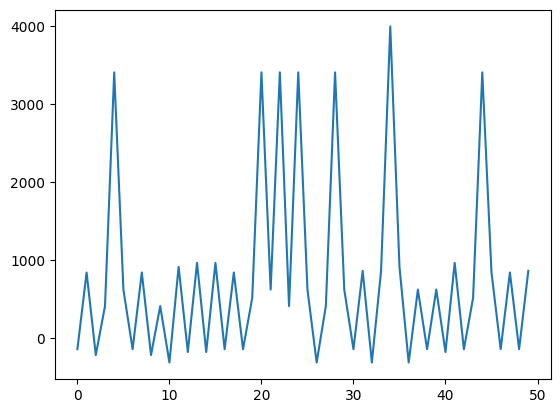

In [54]:
ann = Annealer()
solution, guesses, energies = ann.portfolio_optimisation(df, budget=budget, penalty=1000, q=q)

print(solution)
plt.plot(energies[-50:])

The groundstate has not been achieved so we will instaead try to use multiple rounds of simulated annealing.

## Portfolio Optimisation with Multiple Rounds of SA

We try 30 rounds of SA and take the best solution.

In [59]:
solutions = []
for i in range(30):
    solution, xs, Es = ann.portfolio_optimisation(df, budget=budget, penalty=1000, q=q)
    solutions.append((solution, Es[-1]))

sort_solutions = sorted(solutions, key=lambda x: x[1])
x, E = sort_solutions[0]
print(f"Solution: {x} \nEnergy: {E}")

Solution: [1 0 1 0] 
Energy: -452.8871396709774


Finally, we can see the the optimal solution has been found.